Домашнее задание №0
====



In [273]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [274]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('../datatest/bike-sharing.csv')

In [275]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Задание
====

* Выбрать самостоятельно уровень агрегации (день, неделя, месяц, год), а так же функцию агрегации (среднее, сумма, максимум). 
* Построить базовую наивную модель





Решение
====

In [276]:
# chose needed columns
df = df.loc[:, ['dteday', 'cnt']]

In [277]:
df.head(3)

,dteday,cnt
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32


In [278]:
df.dtypes

dteday    object
cnt        int64
dtype: object

In [279]:
# convert column to correct type - datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [280]:
# set 'dteday' column as index
df.set_index('dteday', inplace=True)

In [281]:
df.head(3)

,cnt
dteday,
2011-01-01,16
2011-01-01,40
2011-01-01,32


In [282]:
# resamle df by month with agg func - mean
df = df.resample('M').sum()    

In [283]:
# check freq
df.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', freq='M')

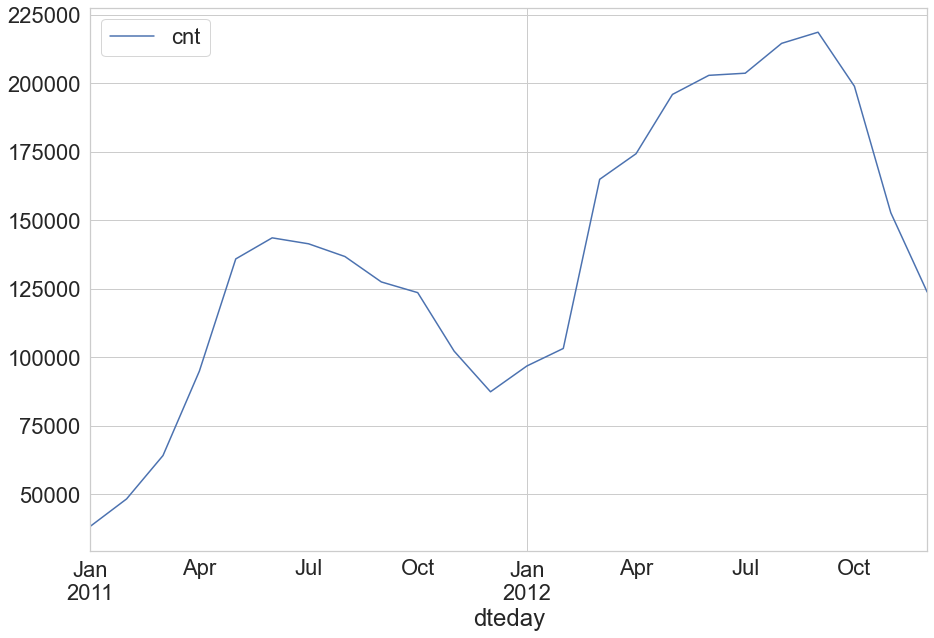

In [284]:
df.plot();

In [285]:
def plot_test_vs_predictions(data, true_col, pred_col):
    '''
    Function plots true data points vs predictions
    
    Parameters
    ----------
    data:  DataFrame
           input data frame
    true_col: str
              column of true data points
    pred_col: str
              columns of predictions
            
    '''
    true_line = Scatter(y = data[true_col],
                       name = 'True data points')
    pred_line = Scatter(y = data[pred_col],
                       name = 'Predictions')

    mae = np.round(mean_absolute_error(data[true_col], data[pred_col]),2)
    r2 = np.round(r2_score(data[true_col], data[pred_col]),2)
    data = [true_line, pred_line]
    layout = Layout(title = f'MAE = {mae}, R2 = {r2}')
    iplot(Figure(data = data,
                layout = layout ))

In [286]:
# create train, test samples
train, test = df[0:-12], df[-12:]

Model 1 (forecast is equal to the average value of historical points)
====

In [287]:
test = test.assign(pred1 = train['cnt'].mean())

In [288]:
plot_test_vs_predictions(test
                         , 'cnt'
                         , 'pred1')

Model 2 (forecast is equal to the average value of the last 12 monthes)
====

In [289]:
test = test.assign(pred2 = train[-12:]['cnt'].mean())

In [290]:
plot_test_vs_predictions(test
                         , 'cnt'
                         , 'pred2')

Model 3 (take the last value of train set)
====

In [291]:
test = test.assign(pred3 = train['cnt'].values[-1])

In [292]:
plot_test_vs_predictions(test
                         , 'cnt'
                         , 'pred3')

Model 4 (shift method)
====

In [293]:
df['pred4'] = df['cnt'].shift()

In [294]:
train, test = df[0:-12], df[-12:]

In [295]:
plot_test_vs_predictions(test
                         , 'cnt'
                         , 'pred4')

Model 5 (count average values for the periods)
====

In [296]:
#df = df.reset_index(level=0)

In [297]:
df.drop('pred4', axis=1, inplace=True)

In [298]:
df.head(3)

,cnt
dteday,
2011-01-31,38189
2011-02-28,48215
2011-03-31,64045


In [300]:
#df['Month'] = df['dteday'].dt.month
df['Month'] = df.index.month

In [301]:
df.head(3)

,cnt,Month
dteday,,
2011-01-31,38189,1
2011-02-28,48215,2
2011-03-31,64045,3


In [302]:
train, test = df[0:-12], df[-12:]

In [303]:
avg_val = train.groupby('Month')['cnt'].mean()
avg_val

Month
1      38189.0
2      48215.0
3      64045.0
4      94870.0
5     135821.0
6     143512.0
7     141341.0
8     136691.0
9     127418.0
10    123511.0
11    102167.0
12     87323.0
Name: cnt, dtype: float64

In [306]:
test = test.assign(pred5 = test['Month'].map(avg_val))

In [307]:
plot_test_vs_predictions(test
                         , 'cnt'
                         , 'pred5')

BEST NAIVE MODEL - MODEL 4 (shift method), MAE = 18842.5, R2 = 0.61
====